# Homework 2 Suggested Solution

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Question 1

The major difference comes from the vocabulary. See (`vectorizer.get_feature_names_out()`). That is, how to recognize a word is different between the two.

# Question 2

In [2]:
import copy
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import OrderedDict

In [3]:
import math

def cosine_sim(vec1, vec2):
    """
    Since our vectors are dictionaries, lets convert them to lists for easier mathing.
    """
    vec1 = [val for val in vec1.values()]
    vec2 = [val for val in vec2.values()]
    
    dot_prod = 0
    for i, v in enumerate(vec1):
        dot_prod += v * vec2[i]
        
    mag_1 = math.sqrt(sum([x**2 for x in vec1]))
    mag_2 = math.sqrt(sum([x**2 for x in vec2]))
    
    return dot_prod / (mag_1 * mag_2)

In [4]:
doc_0 = "The faster Harry got to the store, the faster Harry, the faster, would get home."
doc_1 = "Harry is hairy and faster than Jill."
doc_2 = "Jill is not as hairy as Harry."

In [5]:
corpus = [doc_0, doc_1, doc_2]

vectorizer = TfidfVectorizer(min_df=1)
model = vectorizer.fit_transform(corpus)

print(model.todense())  # The model becomes a sparse numpy matrix, as in a large corpus there would be mostly zeros to deal with.  todense() brings it back to a regular numpy matrix for our viewing pleasure.

[[0.         0.         0.42662402 0.18698644 0.18698644 0.
  0.22087441 0.18698644 0.         0.         0.         0.18698644
  0.         0.74794576 0.18698644 0.18698644]
 [0.46312056 0.         0.35221512 0.         0.         0.35221512
  0.27352646 0.         0.35221512 0.35221512 0.         0.
  0.46312056 0.         0.         0.        ]
 [0.         0.75143242 0.         0.         0.         0.28574186
  0.22190405 0.         0.28574186 0.28574186 0.37571621 0.
  0.         0.         0.         0.        ]]


In [6]:
vector_template = OrderedDict((token, 0) for token in vectorizer.get_feature_names_out())
print(vector_template)

OrderedDict([('and', 0), ('as', 0), ('faster', 0), ('get', 0), ('got', 0), ('hairy', 0), ('harry', 0), ('home', 0), ('is', 0), ('jill', 0), ('not', 0), ('store', 0), ('than', 0), ('the', 0), ('to', 0), ('would', 0)])


In [7]:
document_vectors = []
for doc in model.todense().tolist():

    vec = copy.copy(vector_template)  # So we are dealing with new objects, not multiple references to the same object

    for key, value in zip(vectorizer.get_feature_names_out(), doc):
        vec[key] = value
    document_vectors.append(vec)

In [8]:
query = "How long does it take to get to the store?"
test_vec = vectorizer.transform([query]).todense() 
print(test_vec)

[[0.         0.         0.         0.37796447 0.         0.
  0.         0.         0.         0.         0.         0.37796447
  0.         0.37796447 0.75592895 0.        ]]


In [11]:
test = copy.copy(vector_template)
for key, value in zip(vectorizer.get_feature_names_out(), test_vec.tolist()[0]):
    test[key] = value
print(test)

OrderedDict([('and', 0.0), ('as', 0.0), ('faster', 0.0), ('get', 0.37796447300922725), ('got', 0.0), ('hairy', 0.0), ('harry', 0.0), ('home', 0.0), ('is', 0.0), ('jill', 0.0), ('not', 0.0), ('store', 0.37796447300922725), ('than', 0.0), ('the', 0.37796447300922725), ('to', 0.7559289460184545), ('would', 0.0)])


In [12]:
print(cosine_sim(test, document_vectors[0]))
print(cosine_sim(test, document_vectors[1]))
print(cosine_sim(test, document_vectors[2]))

0.5653938522457077
0.0
0.0


# Question 3

In [11]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/pg70373.txt'

In [12]:
filename = path
file = open(filename, 'rt')
text = file.read()
file.close()

['\ufeffThe', 'Project', 'Gutenberg', 'eBook', 'of', 'Our', 'Arctic', 'province,', 'by', 'Henry', 'Wood', 'Elliott', 'This', 'eBook', 'is', 'for', 'the', 'use', 'of', 'anyone', 'anywhere', 'in', 'the', 'United', 'States', 'and', 'most', 'other', 'parts', 'of', 'the', 'world', 'at', 'no', 'cost', 'and', 'with', 'almost', 'no', 'restrictions', 'whatsoever.', 'You', 'may', 'copy', 'it,', 'give', 'it', 'away', 'or', 're-use', 'it', 'under', 'the', 'terms', 'of', 'the', 'Project', 'Gutenberg', 'License', 'included', 'with', 'this', 'eBook', 'or', 'online', 'at', 'www.gutenberg.org.', 'If', 'you', 'are', 'not', 'located', 'in', 'the', 'United', 'States,', 'you', 'will', 'have', 'to', 'check', 'the', 'laws', 'of', 'the', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'eBook.', 'Title:', 'Our', 'Arctic', 'province', 'Alaska', 'and']


### 1. use just whitespace

In [67]:
words = text.split()

In [68]:
len(words)

86524

In [69]:
puncs = [',', '.', '--', '-', '!', '?', ':', ';', '``', "''", '(', ')', '[', ']']
word_list = [x.lower() for x in words if x not in puncs]

In [75]:
len(word_list)

86519

In [76]:
df1 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df1.head(10)

,freq
the,6380
of,3366
to,2690
and,2482
in,1634
was,1565
a,1542
he,1125
that,1075
on,967


In [77]:
# set up the dataframe
df1.reset_index(inplace=True)
df1.reset_index(inplace=True)
df1 = df1.iloc[:,[0,2]]
df1.columns = ['rank','freq']
df1 = df1.set_index('rank')

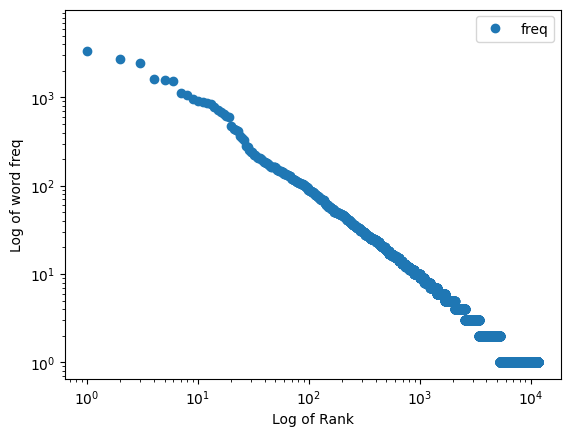

In [78]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 2. Treebank

In [57]:
from nltk.tokenize import TreebankWordTokenizer

In [80]:
words = TreebankWordTokenizer().tokenize(text)

In [81]:
word_list = [x.lower() for x in words if x not in puncs]

In [82]:
len(word_list)

86656

In [83]:
df2 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])
df2.head(10)

,freq
the,6470
of,3398
to,2701
and,2588
in,1638
was,1614
a,1544
he,1127
that,1125
on,985


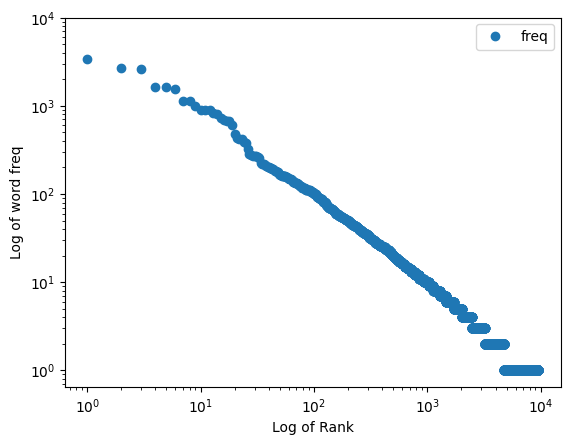

In [84]:
# set up the dataframe
df2.reset_index(inplace=True)
df2.reset_index(inplace=True)
df2 = df2.iloc[:,[0,2]]
df2.columns = ['rank','freq']
df2 = df2.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df2.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

### 3. casual_tokenizer

In [85]:
from nltk.tokenize.casual import casual_tokenize

In [87]:
words = casual_tokenize(text, reduce_len=True, strip_handles=True)

In [88]:
word_list = [x.lower() for x in words if x not in puncs]
len(word_list)

88590

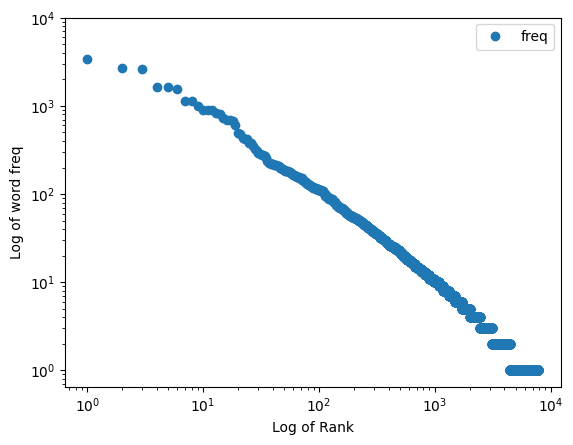

In [89]:
df3 = pd.DataFrame.from_dict(dict(Counter(word_list).most_common()),orient='index',columns=['freq'])

# set up the dataframe
df3.reset_index(inplace=True)
df3.reset_index(inplace=True)
df3 = df3.iloc[:,[0,2]]
df3.columns = ['rank','freq']
df3 = df3.set_index('rank')

fig = plt.figure()
ax = fig.add_subplot(111)
df3.plot(style='o', logx=True, logy=True, ax=ax)

xlabel = plt.xlabel('Log of Rank')
ylabel = plt.ylabel('Log of word freq')
plt.show(block=False)

# Question 4

In [90]:
import string
import re
from os import listdir
from collections import Counter
from nltk.corpus import stopwords

In [91]:
def load_doc(filename):
    # open the file as read only 
    file = open(filename, 'r')
    # read all text
    text = file.read()
    # close the file 
    file.close()
    return text

In [99]:
path = '/Users/yeabinmoon/Documents/ibs_course/BUS243_NLP/HW/data/movie_review/'

In [147]:
df_pos = pd.DataFrame()
for filename in listdir(path+'pos'):
    text = load_doc(path+'pos/'+filename)
    temp = pd.DataFrame({'sentiment':[1],'text':[text]})
    df_pos = pd.concat([df_pos,temp],ignore_index= True)
df_neg = pd.DataFrame()
for filename in listdir(path+'neg'):
    text = load_doc(path+'neg/'+filename)
    temp = pd.DataFrame({'sentiment':[0],'text':[text]})
    df_neg = pd.concat([df_neg,temp],ignore_index= True)


In [148]:
from sklearn.model_selection import train_test_split

In [149]:
train_pos, test_pos = train_test_split(df_pos, test_size=0.15, random_state=42)
train_neg, test_neg = train_test_split(df_neg, test_size=0.15, random_state=42)

In [151]:
train = pd.concat([train_pos,train_neg],ignore_index= True)
test = pd.concat([test_pos,test_neg],ignore_index= True)

In [152]:
train

,sentiment,text
0,1,it is easy to label something sentimental or t...
1,1,as a devout atheist and an avowed believer in ...
2,1,losing a job is not an all too uncommon thing ...
3,1,"the central focus of michael winterbottom's "" ..."
4,1,"in one scene from "" the people vs . \nlarry fl..."
...,...,...
1695,0,another formula 'feel good' quirky comedy from...
1696,0,this well-conceived but ultra sugary coming-of...
1697,0,here's a rarity : a children's film that attem...
1698,0,can a horror movie truly be called a horror mo...


In [153]:
test

,sentiment,text
0,1,"eight years after its release , disney has dec..."
1,1,one of the most popular subplots in the entire...
2,1,sometimes i find 19th century british costume ...
3,1,the start of this movie reminded me of parts f...
4,1,it may seem weird to begin a film about glam r...
...,...,...
295,0,i think that saying that the x-files is one of...
296,0,aspiring broadway composer robert ( aaron will...
297,0,lengthy and lousy are two words to describe th...
298,0,"when i ponder childhood memories past , one of..."
